In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

In [13]:


prefix = '/data4/mankovic/ZOETIS/pathway_ranking/Z75/pathway_scores/Z75_pathway_scores_'

#degree uses max degree norm and pagerank uses unnormalized
similarity = 'correlation'
centrality_type = 'degree' 
best_measure = 'unnormalized'


n_null_trials = 500
epsilon = .00001
alpha = .05

out_prefix = "/data4/mankovic/ZOETIS/pathway_ranking/Z75/pathway_scores_results/Z75_null_"


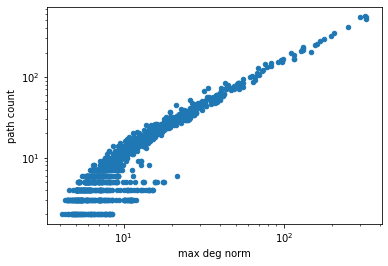

In [17]:
#sanity check
x = pandas.read_csv('./'+similarity+'_'+centrality_type+'.csv')[:-1]
x['max deg norm'] = x['unnormalized']/ x['max degree']

ax = x.plot.scatter('max deg norm', 'path count')
ax.set_yscale('log')
ax.set_xscale('log')

In [38]:
x = pandas.read_csv(prefix+similarity+'_'+centrality_type+'.csv')[:-1]

<AxesSubplot:xlabel='unnormalized', ylabel='path count'>

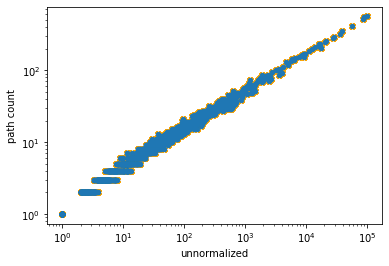

In [7]:
ys = []

y = pandas.read_csv(prefix+'null0'+similarity+'_'+centrality_type+'.csv')[:-1]
ys.append(y)
pids  = list(y['pathway_id'])
ax = y.plot.scatter(best_measure, 'path count', color = 'orange', alpha = .5)

ax.set_yscale('log')
ax.set_xscale('log')
for i in range(1,n_null_trials):
    y = pandas.read_csv(prefix+'null'+str(i)+similarity+'_'+centrality_type+'.csv')[:-1]
    ys.append(y)
    y.plot.scatter(best_measure, 'path count', ax = ax, color = 'orange', alpha = .5, marker = 'x')
    pids += list(y['pathway_id'])
pids = np.unique(pids)
    # print(len(y))
x.plot.scatter(best_measure,'path count', ax = ax)

In [5]:
# ys = []
# pids = list(x['pathway_id'])
# for i in range(50):
#     y = pandas.read_csv(prefix+'null'+str(i)+'heatkernel_degree.csv')[:-1]
#     ys.append(y)
#     print(len(y))
#     pids+= list(y['pathway_id'])
# pids = np.unique(pids)


In [6]:
len(pids)

2260

In [7]:
# #fix inconsistencies
# jj=0
# for p in pids:
#     for i in range(n_null_trials):
#         y = ys[i]
#         if p not in list(y['pathway_id']):
#             p_dict = {'pathway_id':p, 
#           'unnormalized':0, 
#           'path norm':0, 
#           'feature path norm':0, 
#           'avg degree norm':0, 
#           'max degree norm':0, 
#           'feature path count':0,
#           'path count': np.nan}
#             y = y.append(p_dict, ignore_index=True)
#         ys[i] = y
#     jj+=1
#     if jj %100 == 0:
#         print(100*jj/len(pids))

            

In [8]:
# for y in ys:
#     print(len(y))

In [9]:
#fix inconsistencies

# jj=0
# for p in pids:

#     if p not in list(x['pathway_id']):
#         p_dict = {'pathway_id':p, 
#       'unnormalized':0, 
#       'path norm':0, 
#       'feature path norm':0, 
#       'avg degree norm':0, 
#       'max degree norm':0, 
#       'feature path count':0,
#       'path count': np.nan}
#         x = x.append(p_dict, ignore_index=True)

#     jj+=1
#     if jj %100 == 0:
#         print(100*jj/len(pids))

            

In [10]:
len(x)

2260

In [11]:
x = x.sort_values('pathway_id')
x[best_measure] = np.array(x[best_measure])/np.linalg.norm(np.array(x[best_measure]))
for i in range(len(ys)):
    ys[i] = ys[i].sort_values('pathway_id')
    ys[i][best_measure] = np.array(ys[i][best_measure])/np.linalg.norm(np.array(ys[i][best_measure]))

In [12]:
x

,pathway_id,unnormalized,path norm,feature path norm,max degree norm,feature path count,path count
164,pw_mtx_R-HSA-1059683,0.000000,0.000000,NaN,0.000000,0,11
3,pw_mtx_R-HSA-109581,0.006844,0.005514,1.003562,0.013381,1,182
0,pw_mtx_R-HSA-109582,0.081986,0.019329,1.001900,0.126556,12,622
196,pw_mtx_R-HSA-109606,0.000000,0.000000,NaN,0.000000,0,55
1832,pw_mtx_R-HSA-109703,0.000000,0.000000,NaN,0.000000,0,2
...,...,...,...,...,...,...,...
1285,pw_mtx_R-HSA-983695,0.000000,0.000000,NaN,0.000000,0,32
653,pw_mtx_R-HSA-983705,0.000000,0.000000,NaN,0.000000,0,112
513,pw_mtx_R-HSA-983712,0.013691,0.010794,1.003854,0.087292,2,186
1209,pw_mtx_R-HSA-991365,0.006986,0.023826,1.024512,0.032016,1,43


In [13]:

#another plot
# ax = ys[0].plot.scatter('pathway_id', best_measure, color = 'orange', alpha = .5, marker = 'x')
# for i in range(1,n_null_trials):
#     ys[i].plot.scatter('pathway_id', best_measure, ax = ax, color = 'orange', alpha = .5, marker = 'x')
# x.plot.scatter('pathway_id', best_measure, ax = ax)


In [14]:
null_array = np.vstack([np.array(y[best_measure])for y in ys])
test_array = np.array(x[best_measure])

In [15]:
# bigger_than_std_pid = list(x['pathway_id'][np.where(np.abs(np.mean(null_array, axis = 0) - test_array) > np.std(null_array, axis= 0))[0]])

# len(bigger_than_std_pid)



In [16]:
#statistical significance by the CePa Paper
bigger_genes = np.zeros(null_array.shape)
for i in range(n_null_trials):
    idx = np.where(test_array < null_array[i,:])
    bigger_genes[i, idx] = 1
    
p_val = np.mean(bigger_genes, axis = 0)

x['p_val'] = p_val


In [17]:
x.to_csv(out_prefix+directed+'_'+centrality_type+'_'+str(n_null_trials)+'null.csv')

Text(0, 0.5, 'p_val')

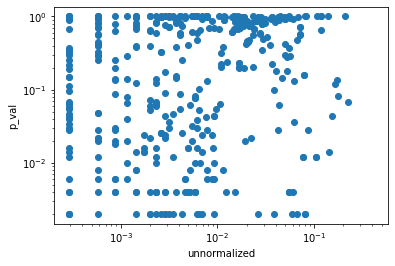

In [18]:
plt.scatter(x[best_measure], x['p_val'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(best_measure)
plt.ylabel('p_val')

In [16]:
#.05 for correlation, degree
#.1 for heatkernel, degree

out = x.query('p_val < @epsilon and `{0}` > @alpha'.format(best_measure)).sort_values(best_measure, ascending = False)[['pathway_id', best_measure, 'p_val', 'feature path count', 'path count']]
print(len(out))

out.to_csv(centrality_type+'_'+directed+'_'+str(epsilon)+'_'+str(alpha)+'.csv')

# idx = list(set(np.where(p_val < epsilon)[0]).intersection(set(np.where(test_array > alpha)[0])))
# x.iloc[idx].sort_values(best_measure)[['pathway_id',best_measure, 'feature path count', 'path count']]

19


In [17]:
out

,pathway_id,unnormalized,p_val,feature path count,path count
3,pw_mtx_R-HSA-168256.csv,0.389511,0.0,30,1127
30,pw_mtx_R-HSA-162582.csv,0.389465,0.0,30,1486
27,pw_mtx_R-HSA-1280215.csv,0.194983,0.0,15,386
2,pw_mtx_R-HSA-168249.csv,0.194876,0.0,15,601
19,pw_mtx_R-HSA-597592.csv,0.194840,0.0,15,787
368,pw_mtx_R-HSA-913531.csv,0.130457,0.0,10,110
4,pw_mtx_R-HSA-6798695.csv,0.117124,0.0,9,268
677,pw_mtx_R-HSA-909733.csv,0.079089,0.0,6,36
1141,pw_mtx_R-HSA-1169410.csv,0.078884,0.0,6,46
353,pw_mtx_R-HSA-1474244.csv,0.078487,0.0,6,182


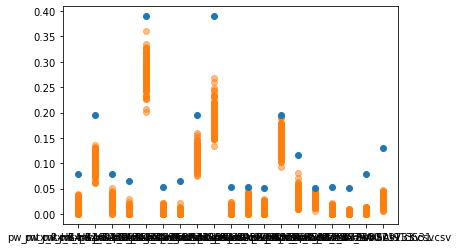

In [18]:
for i in range(n_null_trials):
    y_query = ys[i][ys[i]['pathway_id'].isin(list(out['pathway_id']))]
    plt.scatter(y_query['pathway_id'],y_query[best_measure], color = 'tab:orange', alpha = .5)
plt.scatter(out['pathway_id'], out[best_measure], color= 'tab:blue')


# For Eric Results

In [2]:
prefix = '../pathway_ranking/Z42_featureset2/Z42_pathway_scores_'
sim_type = 'correlation'
centrality_type = 'degree'
epsilon = .00001
alpha = .05
out = pandas.read_csv(centrality_type+'_'+sim_type+'_'+str(epsilon)+'_'+str(alpha)+'.csv')
out = out.sort_values('max degree norm', ascending = False)
out

,Unnamed: 0,pathway_id,max degree norm,p_val,feature path count,path count
12,7,p_1050,0.186178,0.0,14,749.0
11,16,p_174,0.144955,0.0,10,368.0
10,28,p_803,0.106147,0.0,7,225.0
9,22,p_2067,0.104568,0.0,7,264.0
8,78,p_206,0.076730,0.0,5,74.0
7,72,p_70,0.070320,0.0,5,105.0
6,83,p_2169,0.069994,0.0,5,65.0
5,68,p_1270,0.069432,0.0,5,103.0
4,57,p_614,0.060096,0.0,5,147.0
3,79,p_1273,0.059779,0.0,4,91.0


In [3]:
all_out = pandas.DataFrame(columns = ['correlation_degree', 'correlation_page_rank', 'heatkernel_degree', 'heatkernel_page_rank', 'n_features']+['rid_'+str(i) for i in range(40)])

In [4]:

pathway_data = pandas.read_csv('/data4/mankovic/De-Identified_CZ/deidentified_fcpw_updated.csv')
pathway_data = pathway_data.fillna(0)

Z42_features = pandas.read_csv('/data4/mankovic/De-Identified_CZ/z42_features_after_hyperparameter_search.csv', index_col = 0)
featureset_randIDs = [str(r) for r in list(Z42_features.index)]

featureset_randIDs

['10158',
 '10179',
 '10414',
 '10505',
 '10540',
 '10621',
 '10627',
 '10716',
 '10814',
 '10921',
 '10935',
 '10961',
 '10966',
 '11015',
 '11074',
 '11141',
 '1121',
 '11245',
 '11260',
 '11474',
 '11556',
 '11604',
 '1171',
 '11770',
 '11794',
 '11849',
 '1189',
 '11929',
 '11971',
 '1204',
 '12134',
 '12175',
 '12201',
 '12204',
 '12239',
 '12371',
 '12528',
 '12531',
 '1255',
 '12725',
 '12866',
 '12908',
 '13008',
 '13057',
 '13099',
 '13258',
 '13311',
 '13436',
 '13491',
 '13614',
 '13619',
 '13726',
 '13836',
 '13861',
 '13884',
 '13941',
 '13985',
 '14049',
 '14194',
 '1437',
 '14401',
 '14479',
 '14517',
 '14531',
 '14584',
 '14595',
 '14612',
 '14643',
 '14715',
 '14723',
 '14789',
 '14850',
 '14900',
 '15003',
 '15008',
 '15016',
 '15022',
 '1511',
 '15156',
 '15173',
 '15221',
 '15322',
 '15325',
 '15331',
 '15337',
 '15340',
 '15502',
 '15551',
 '15582',
 '15613',
 '15689',
 '15732',
 '15822',
 '15838',
 '15851',
 '15962',
 '16200',
 '16243',
 '16246',
 '16325',
 '1655'

In [5]:
i=0
for index, row in out.iterrows():
    pid = row['pathway_id']
    pathway = pathway_data[pathway_data['RandID'] == pid]
    pathway_randIDs = [str(int(float(rid))) for rid in pathway.columns[np.where(pathway == 1)[1]]]
    feat_path = list(set(pathway_randIDs).intersection(featureset_randIDs))
    a_df = pandas.DataFrame([[i, row['feature path count']]+feat_path], columns = [sim_type+'_'+centrality_type, 'n_features']+['rid_'+str(i) for i in range(len(feat_path))], index = [pid])
    all_out = all_out.append(a_df)
    i+=1

all_out

,correlation_degree,correlation_page_rank,heatkernel_degree,heatkernel_page_rank,n_features,rid_0,rid_1,rid_2,rid_3,rid_4,...,rid_30,rid_31,rid_32,rid_33,rid_34,rid_35,rid_36,rid_37,rid_38,rid_39
p_1050,0,NaN,NaN,NaN,14,24830,1121,21399,12371,15325,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p_174,1,NaN,NaN,NaN,10,6965,26860,16243,31279,26646,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p_803,2,NaN,NaN,NaN,7,7197,27568,31456,341,25781,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p_2067,3,NaN,NaN,NaN,7,26860,16243,31279,26646,9251,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p_206,4,NaN,NaN,NaN,5,31456,341,25781,31550,20050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p_70,5,NaN,NaN,NaN,5,25719,11794,16847,11015,4475,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p_2169,6,NaN,NaN,NaN,5,30321,31558,29800,2059,18057,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p_1270,7,NaN,NaN,NaN,5,30321,31558,29800,2059,18057,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p_614,8,NaN,NaN,NaN,5,24830,1121,30471,7451,33772,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p_1273,9,NaN,NaN,NaN,4,11015,16847,11794,4475,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:

for sim_type, centrality_type in zip(['correlation', 'heatkernel', 'heatkernel'], ['page_rank', 'degree', 'page_rank']):
    if sim_type == 'heatkernel' and centrality_type =='degree':
        alpha = .1
    else:
        alpha = .05

    if centrality_type =='degree':
        sort_col = 'max degree norm'
    else:
        sort_col = 'unnormalized'


    epsilon = .00001
    
    out = pandas.read_csv(centrality_type+'_'+sim_type+'_'+str(epsilon)+'_'+str(alpha)+'.csv').sort_values(sort_col, ascending = False)

    i=0
    for index, row in out.iterrows():
        pid = row['pathway_id']
        if pid in list(all_out.index):
            all_out[sim_type+'_'+centrality_type][pid] = i
        else:
            pathway = pathway_data[pathway_data['RandID'] == pid]
            pathway_randIDs = [str(int(float(rid))) for rid in pathway.columns[np.where(pathway == 1)[1]]]
            feat_path = list(set(pathway_randIDs).intersection(featureset_randIDs))
            a_df = pandas.DataFrame([[i, row['feature path count']]+feat_path], columns = [sim_type+'_'+centrality_type, 'n_features']+['rid_'+str(i) for i in range(len(feat_path))], index = [pid])
            all_out = all_out.append(a_df)
        i+=1

In [7]:
all_out= all_out.sort_index()
all_out

,correlation_degree,correlation_page_rank,heatkernel_degree,heatkernel_page_rank,n_features,rid_0,rid_1,rid_2,rid_3,rid_4,...,rid_30,rid_31,rid_32,rid_33,rid_34,rid_35,rid_36,rid_37,rid_38,rid_39
p_1050,0,0,NaN,0,14,24830,1121,21399,12371,15325,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p_1270,7,7,NaN,7,5,30321,31558,29800,2059,18057,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p_1273,9,11,NaN,10,4,11015,16847,11794,4475,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p_1274,NaN,NaN,7,NaN,3,30471,7451,33772,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p_143,12,12,NaN,12,4,30321,18057,2059,31558,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p_1452,NaN,NaN,0,NaN,13,6965,16243,26860,3589,31279,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p_1639,NaN,13,NaN,13,4,30321,2059,32735,31558,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p_174,1,1,1,1,10,6965,26860,16243,31279,26646,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p_206,4,5,5,4,5,31456,341,25781,31550,20050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p_2067,3,3,3,3,7,26860,16243,31279,26646,9251,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
